## Statistics and Linear Algebra refresh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

## Mean and covariance
 
If $X$ and $Y$ represent two sets of random samples from a dataset then the mean and convariance are defined as follows.  
The [mean](https://en.wikipedia.org/wiki/Mean) $\mu_X$ is the [expected value](https://en.wikipedia.org/wiki/Expected_value) over all samples $X$.

$$\mu_X = \mathbb{E}[X]$$

The [covariance](https://en.wikipedia.org/wiki/Covariance) measures how dependend two random variables are and how they change together. This covariance between sets of samples is defined as:

$$C(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)^T] = \Sigma_{X,Y} $$

And the covariance of a set of samples with itself is defined by $C(X,X) = \Sigma_{X}$.

## Multivariate Guassian

The [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (normal) distribution is a multidimensional generalisation of the one-dimensional [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

The standard normal distribution has a [density](https://en.wikipedia.org/wiki/Probability_density_function) defined as:

$$ p(x) = (2\pi\sigma^2)^{-1/2} e^{\textstyle \left( -\frac{1}{2\sigma^2}(x - \mu)^2\right)} $$

With $x$ a random variable with mean $\mu$ and [variance](https://en.wikipedia.org/wiki/Variance) $\sigma^2$.  
The multivariate Gaussian has a [joint probability](https://en.wikipedia.org/wiki/Joint_probability_distribution) density given by:

$$ p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = (2\pi)^{-d/2} \lvert\Sigma\rvert^{-1/2} e^{\textstyle \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)} $$

Where $\mathbf{x}$ a random vector of size $d$ with $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the (symmetric, positive
definite) covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its [determinant](https://en.wikipedia.org/wiki/Determinant). As a shorthand we write:

$$\mathbf{x} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)$$

An example of both the univarite and bivariate Guassian distribution are plotted below. The figure on the left is a univariate distrubution with mean $\mu=0$ and variance $\sigma^2 = 1$. The figure on the right is a bivariate distribution with mean $\mathbf{\mu} = [0, 1]$ and covariance with $C(x_1,x_1) = C(x_2,x_2) = 1$ and $C(x_1,x_2) = C(x_2,x_1) = 0.75$. Note that because the covariance between $x_1$ and $x_2$ is not 0 that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase.

In [2]:
def univariate_gaussian(x, mean, variance):
    return np.sqrt(2 * np.pi * variance) * np.exp(-(x - mean)**2 / (2 * variance))

def multivariate_gaussian(x, d, mean, covariance):
    x_m = x - mean
    return np.sqrt((2 * np.pi)**d * np.linalg.det(covariance)) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m))/2)

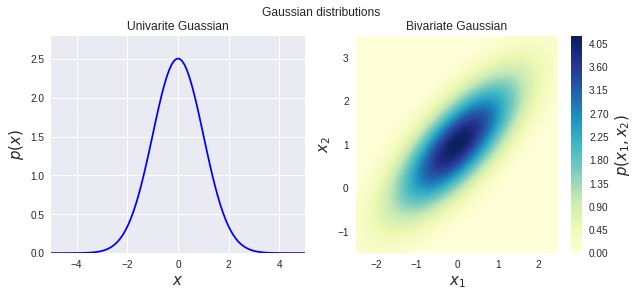

In [3]:
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot univariate distribuition
univariate_mean = 0  # Mean
univariate_variance = 1  # Variance
x = np.linspace(-5, 5, num=100)
y = univariate_gaussian(x, univariate_mean, univariate_variance)
# Plot univariate distribution
ax1.plot(x, y, 'b-')
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$p(x)$', fontsize=15)
ax1.axis([-5, 5, 0, 2.8])
ax1.set_title('Univarite Guassian')

# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate surface to plot."""
    nb_of_x = 100 # compute the cost nb_of_ws times in each dimension
    x1s = np.linspace(-5, 5, num=nb_of_x) # hidden weights
    x2s = np.linspace(-5, 5, num=nb_of_x) # output weights
    x1, x2 = np.meshgrid(x1s, x2s) # generate grid
    p = np.zeros((nb_of_x, nb_of_x)) # initialize cost matrix
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            p[i,j] = multivariate_gaussian(np.matrix([[x1[i,j]], [x2[i,j]]]), d, mean, covariance)
    return x1, x2, p  # x1, x2, p(x1,x2)

d = 2  # number of dimensions
bivariate_mean = np.matrix([[0], [1]])  # Mean
bivariate_covariance = np.matrix([[1, 0.75], [0.75, 1]])  # Covariance
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=15)
ax2.set_ylabel('$x_2$', fontsize=15)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_title('Bivariate Gaussian')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=15)
plt.suptitle('Gaussian distributions')
plt.show()

### Mean and Variance of affine transformations of the multivariate Gaussian
 
It is possible to transform a [multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Affine_transformation) distribution into a new Guassian distribution with an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation). More specificaly if $X$ is Gaussian distributed and $Y = LX + u$ with $L$ a [linear transformation](https://en.wikipedia.org/wiki/Linear_map) and $u$ a vector then $Y$ is also Guassian distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$.

$$L \sim \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T)$$

This can be proven als follows:

$$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u$$

$$\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}$$

## Sampling from a multivariate Gaussian

The previous result helps us to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
To do this sampling we can sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) $\Sigma=I_d$. Sampling from this distribution is easy because each variable in $X$ is [independent](https://en.wikipedia.org/wiki/Linear_independence) from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by an affine transform on the samples $X$. This tranform is $Y = LX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = L\Sigma_{X}L^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = L I_d L^\top = L L^\top$. $L$ can now be found by a technique called the [Cholesky decompostion](https://en.wikipedia.org/wiki/Cholesky_decomposition) which does exactly the decomposition we need. The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).

Lets try this out by sampling 50 samples from:

$$
Y
\sim
\mathcal{N}\left(
\left[\begin{array}{c} 0 \\ 1 \end{array}\right],
\left[\begin{array}{cc}
1 & 0.75 \\
0.75 & 1
\end{array}\right]\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.

In [4]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0], [1]])
covariance = np.matrix([[1, 0.75], [0.75, 1]])
n = 50  # Samples to draw

# Create L
L = np.linalg.cholesky(covariance)
# Sample from standart normal
X = np.random.normal(size=(d,n))
# Apply the transformation
Y = L.dot(X) + mean

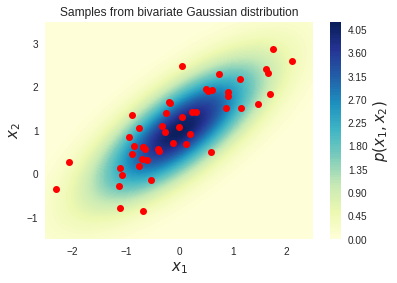

In [5]:
# Plot the samples and the distribution
fig, ax = plt.subplots()
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro')
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_title('Samples from bivariate Gaussian distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=15)
plt.show()

## Marginal and Conditional Gaussian distributions

If both $\mathbf{x}$ and $\mathbf{y}$ are [jointly Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Joint_normality) random vectors defined as:
$$
\left[\begin{array}{c} \mathbf{x} \\ \mathbf{y} \end{array}\right]
\sim
\mathcal{N}\left(
\left[\begin{array}{c} \mu_{\mathbf{x}} \\ \mu_{\mathbf{y}} \end{array}\right],
\left[\begin{array}{cc}
A & C \\
C^T & B
\end{array}\right]
\right)
= \mathcal{N}(\mu, \Sigma)
, \qquad 
\Sigma^{-1} = \Lambda = 
\left[\begin{array}{cc}
\tilde{A} & \tilde{C} \\
\tilde{C}^T & \tilde{B}
\end{array}\right]
$$

Then the [marginal distributions](https://en.wikipedia.org/wiki/Marginal_distribution) of $\mathbf{x}$ and $\mathbf{y}$ are defined as:
$$\begin{split}
p(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, A) \\
p(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, B)
\end{split}$$


The [conditional distribution](https://en.wikipedia.org/wiki/Conditional_probability_distribution) of $\mathbf{x}$ given $\mathbf{y}$ is:
$$p(\mathbf{x} \mid \mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y})$$

With:
$$\begin{split}
\Sigma_{x|y} & = A - CB^{-1}C^\top = \tilde{A}^{-1} \\
\mu_{x|y} & = \mu_x + CB^{-1}(\mathbf{y}-\mu_y)
\end{split}$$

With $A - CB^{-1}C^\top = \tilde{A}^{-1}$ the [Schur complement](https://en.wikipedia.org/wiki/Schur_complement) of B in $\Sigma$. You can find the full proof at [R. Wang's notes](http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html).  
The computation of the [conditional covariance](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions) matrix $\Sigma_{x|y}$ can be viewed as inverting the covariance matrix $\Sigma^{-1} = \Lambda$, dropping the rows and columns corresponding to the variables $\mathbf{y}$ that are being conditioned upon (Selecting $\tilde{A}$), and inverting back to get the conditional covariance matrix $\Sigma_{x|y}=\tilde{A}^{-1}$.

The shift of the mean can be seen as getting the [residual](https://en.wikipedia.org/wiki/Errors_and_residuals) of the variable conditioned upon ($\mathbf{y}-\mu_y$), normalising this with the covariance $B$ of the variable conditioned upon, and transforming it to the space of $\mathbf{x}$ by the covariances between $\mathbf{x}$ and $\mathbf{y}$ ($C$).

The conditional distributions of the example used above are calculated and plotted in the following code:

In [6]:
d=2
mean = np.matrix([[0], [1]])
cov = np.matrix([[1, 0.75], [0.75, 1]])

# Get the mean values from the vector
mean_x1 = mean[0,0]
mean_x2 = mean[1,0]
# Get the blocks (single values in this case) from the covariance matrix
A = cov[0,0]
B = cov[1,1]
C = cov[0,1]  # = C transpose in this case

# Calculate x1|x2
x2_condition = 2  # To condition on x2

mean_1given2 = mean_x1 + C*(1/B)*(x2_condition - mean_x2)
cov_1given2 = A - C*(1/B)*C

# Calculate x2|x1
x1_condition = 1  # To condition on x1
mean_2given1 = mean_x2 + C*(1/A)*(x1_condition - mean_x1)
cov_2given1 = B - C*(1/A)*C

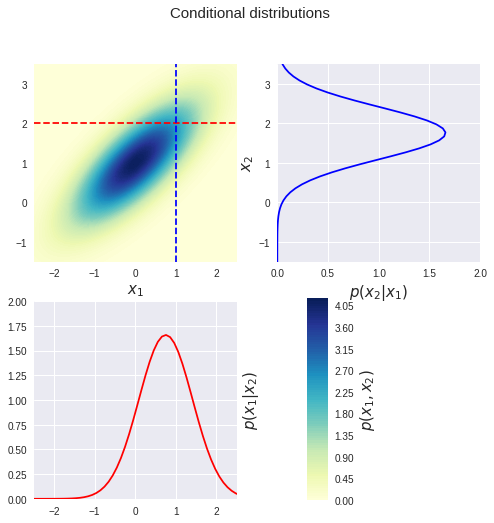

In [12]:
# Plot the conditional distributions 
x1, x2, p = generate_surface(mean, cov, d)  # Get the probability surface

# subplot
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax5 = fig.add_axes([0.6, 0.123, 0.035, 0.35])  # Axis for colorbar [left, bottom, width, height] 

# Plot surface on top left
x1, x2, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.plot([-2.5, 2.5], [2, 2], 'r--')  # x2=2 that is conditioned upon
ax1.plot([1, 1], [-1.5, 3.5], 'b--')  # x1=1 that is conditioned upon
ax1.set_xlabel('$x_1$', fontsize=15)
ax1.set_ylabel('$x_2$', fontsize=15)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot x2|x1
y = np.linspace(-5, 5, num=100)
x = univariate_gaussian(x, mean_2given1, cov_2given1)
# Plot univariate distribution
ax2.plot(x, y, 'b-')
ax2.set_xlabel('$p(x_2|x_1)$', fontsize=15)
ax2.axis([0, 2, -1.5, 3.5])

# Plot x1|x2
x = np.linspace(-5, 5, num=100)
y = univariate_gaussian(x, mean_1given2, cov_1given2)
# Plot univariate distribution
ax3.plot(x, y, 'r-')
ax3.set_ylabel('$p(x_1|x_2)$', fontsize=15)
ax3.yaxis.set_label_position('right')
ax3.axis([-2.5, 2.5, 0, 2])

# Clear axis 4 and plot colarbar in its place
ax4.set_frame_on(False)
ax4.axes.get_yaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
# Plot colorbar
cbar = plt.colorbar(con, cax=ax5)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=15)

plt.suptitle('Conditional distributions', fontsize=15)
plt.show()